![Day 4](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Info-graphs/Day%203.png)

## Step 1：数据预处理
* 导入相关库
* 导入数据集
* 检查缺失数据
* 数据分类
* 有必要的话，编辑虚拟变量（注意避免虚拟变量陷阱）
* 使用简单的线性回归模型进行特征缩放

In [1]:
# 导入库
import numpy as np
import pandas as pd

# 导入数据集
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,4].values

# 将类别数据数字化
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# 躲避虚拟变量陷阱
X = X[:,1:]

# 拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Step 2: 在训练集上训练多元线性回归模型

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 3: 在测试集上测试结果

In [4]:
Y_pred = regressor.predict(X_test)
print(Y_pred)
print(regressor.score(X_test,Y_test))

[103015.20159796 132582.27760815 132447.73845175  71976.09851258
 178537.48221056 116161.24230166  67851.69209676  98791.73374687
 113969.43533013 167921.06569551]
0.9347068473282446


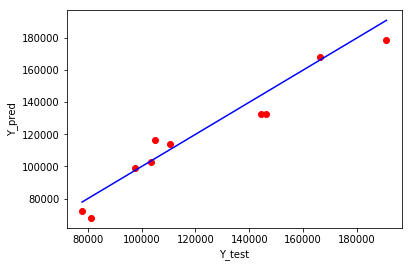

In [8]:
# 误差可视化
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(Y_test, Y_pred, color = 'red')
plt.plot((Y_test.min(),Y_test.max()),(Y_test.min(),Y_test.max()), color = 'blue')
plt.xlabel('Y_test'); plt.ylabel('Y_pred')
plt.show()